<div style="float:right;padding-top:20px">
   <img src="https://www.enib.fr/images/logo-enib-accueil.jpg" style="width:120px"/>
</div>

# RLC High Pass Filter

<div style="padding-top: 40px">
<div class="alert alert-info" role="alert" >
    <ul>
        <li><b>Contributor:</b> CARREE Ewan</li>
        <li><b>LT spice file: </b><a href="./asc/RLC_HP.asc">Download</a></li>
     </ul>
</div>
</div>

In [1]:
#commande permettant l'interaction dans les zone de graphes directement dans le navigateur. A PLACER EN 1e LIGNE
%matplotlib notebook
#bibliotheque definissant tous les opérations de calcul
from numpy import *
#librairie avec les fonctions permetttant l'affichage
from matplotlib.pyplot import * 
#bibliotheque emarquant les fonctions permettant l'étude des systemes linéaires.
import scipy.signal as sig 
from custom_lib import show
from math import sqrt
from math import pi

## Electronic Circuit

<img src="./img/RLC_HP.svg" width="300px">

The circuit transfer function is given by (see [proof](#proof)) :
$$T(p)=\frac{LCp^2}{LCp^2+ RCp+ 1}$$

## Parameter Identification

The function `compute_parameters` evaluates the filter parameters from the filter components.

In [2]:
def compute_parameters(R,L,C):
    # compute your parameter here
    w0 = 1/sqrt(L*C)
    f0 = w0/(2*pi)
    m = (R/2)*sqrt(C/L)
    Too = L*C
    Tw0 = 1/((R*C)/sqrt(L*C))
    return {"w0":w0,"f0":f0,"m":m,"Too":Too,"Tw0":Tw0}

In [3]:
R, L, C = 10000, 5*(10**-2), 3*(10**-10)

parameters = compute_parameters(R,L,C)
show(parameters,name = "parameter")

HTML(value="<table class='table' style='margin-top: 10px'><tr><th scope='col' style='width: 20%'>Parameter</th…

## Component Selection

The function `compute_component` compute the filter components from some filter specification.

In [4]:
def compute_component(f0,m,Too):
    # compute your component here
    C = 3*(10**-10) #on fixe C pour pouvoir résoudre le reste
    L = 1/(((2*pi*f0)**2)*C)
    R = 2*m/(sqrt(C/L))
    return {"R":R,"L":L,"C":C}

In [9]:
#f0, m, Too = 41093.62960409999, 0.38729833462074165, 1.5e-11
f0, m, Too = 50000, 1, 1

components = compute_component(f0,m,Too)
show(components,name = "component")

HTML(value="<table class='table' style='margin-top: 10px'><tr><th scope='col' style='width: 20%'>Component</th…

## Demonstration
<a id='proof'></a>

fonction de transfert : $$Vs=\frac{Zl*Ve}{Zl+Zr+Zc}$$
                        $$T=\frac{Zl}{Zl+Zr+Zc}$$
                        $$=\frac{jLw}{R+jLw+1/jCw}$$
                        $$=\frac{LCp^2}{1+RCp+LCp^2}$$
                        
                        
forme canonique : $$T(p) =\frac {b2p^2}{1 + \frac{2mp}{w0} + \frac {p^2}{w0^2}}$$


on en déduit : 
la pulsation propre du système : $$w0^2 = \frac{1}{LC}$$
                                 $$w0 = \frac{1}{sqrt(LC)}$$

le coefficient d'amortissement : $$\frac{2*m}{w0} = RC$$
                                 $$m = \frac{RC}{2*sqrt(LC)} = (\frac{R}{2})*sqrt(\frac{C}{L})$$
                      

<IPython.core.display.Javascript object>


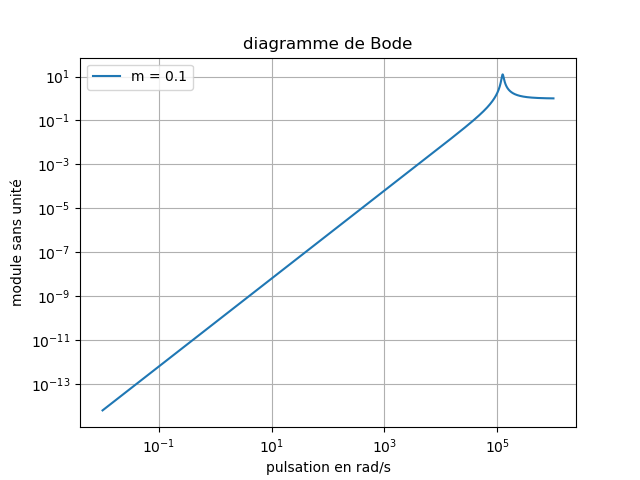

In [6]:
den = [1/(2*pi*f0**2),2*m/(2*pi*f0), 1] #coef du polynome dans l'ordre decroissant des puissance (de jw) JUSQUA 0
num = [Too/(2*pi*f0**2),0,0]
TLP = sig.lti(num,den) #generation du systeme linéaire correspondant à cette fonctionde transfert
[w,T]=TLP.freqresp() #calcul de Tcomplexe pour toutes les pulsations
mod=abs(T) #definition du module
arg=180*angle(T)/pi #definition de l'argument en degrés
figure(1)
loglog(w,mod,label = "m = "+str(m)) #trace sur echelles log log avec legende correspondante à la trace calculée 
    
figure(1)
ylabel("module sans unité")
xlabel("pulsation en rad/s")
title("diagramme de Bode")
legend()
grid()

<IPython.core.display.Javascript object>


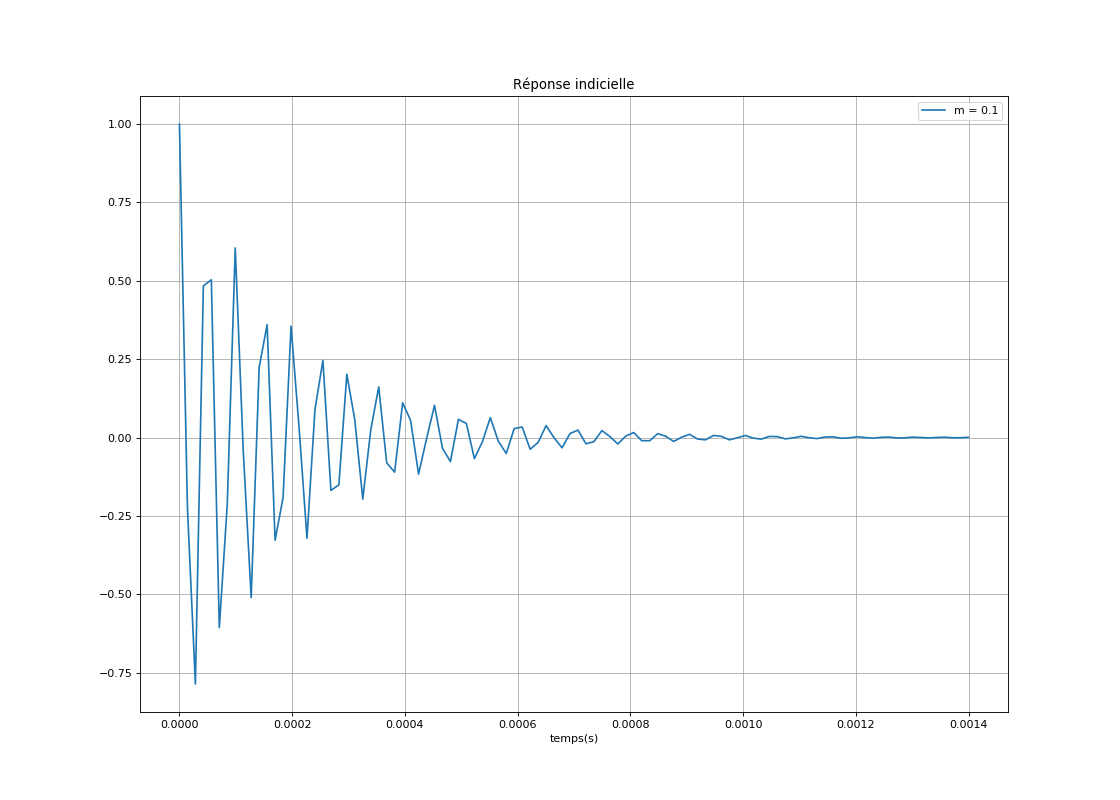

In [7]:
figure(figsize=(14,10), dpi=80)

den = [1/(2*pi*f0**2),2*m/(2*pi*f0), 1] #coef du polynome dans l'ordre decroissant des puissance (de jw) JUSQUA 0
num = [Too/(2*pi*f0**2),0,0]
H = sig.lti(num,den)
t,s = H.step()
plot(t,s,label = "m = "+str(m) )
    
legend()    
#figure(1)
xlabel("temps(s)")
title("Réponse indicielle")
grid()